In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df= df.select_dtypes(include = ["float64","int64"])

In [5]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table = df["table"]

In [7]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

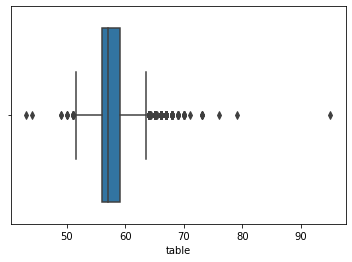

In [8]:
sns.boxplot(x = df_table)

In [9]:
Q1 = df_table.quantile(0.25)

In [10]:
Q3 =df_table.quantile(0.75)

In [11]:
IQR = Q3 - Q1
IQR

3.0

In [12]:
low_lim = Q1 - IQR

In [13]:
upp_lim = Q3 + IQR

In [15]:
df_aykiri = (df_table < low_lim)

In [18]:
df_table[df_aykiri].index

Int64Index([  243,   995,  1198,  1515,  3238,  3979,  4150,  4268,  5114,
             5144,  5207,  5979,  7418,  8853, 10540, 10676, 10992, 11312,
            11368, 11804, 13092, 15230, 15468, 15506, 15858, 16010, 17164,
            18558, 20778, 21086, 21406, 22701, 23408, 24815, 25179, 25607,
            26387, 26431, 27359, 27593, 28812, 29554, 30489, 31863, 32000,
            32629, 33112, 33408, 33552, 33586, 35633, 35828, 35940, 36077,
            38834, 40577, 41208, 41858, 42771, 42958, 43368, 43412, 45495,
            45798, 46040, 46531, 46895, 47630, 48019, 48316, 50730, 51068,
            51606, 52651, 53026, 53688],
           dtype='int64')

silme yöntemi

In [19]:
type(df_table)

pandas.core.series.Series

In [20]:
df_table = pd.DataFrame(df_table)

In [41]:
t_df = df_table[~((df_table < low_lim) | (df_table > upp_lim)).any(axis = 1)]

In [42]:
t_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


ortalama ile doldurma

In [48]:
df_table[df_aykiri] = df_table.mean

In [49]:
df_table[df_aykiri]

,table
243,<bound method NDFrame._add_numeric_operations....
995,<bound method NDFrame._add_numeric_operations....
1198,<bound method NDFrame._add_numeric_operations....
1515,<bound method NDFrame._add_numeric_operations....
3238,<bound method NDFrame._add_numeric_operations....
...,...
51068,<bound method NDFrame._add_numeric_operations....
51606,<bound method NDFrame._add_numeric_operations....
52651,<bound method NDFrame._add_numeric_operations....
53026,<bound method NDFrame._add_numeric_operations....


baskılama yöntemi

In [45]:
low_lim

53.0

In [46]:
df_table[df_aykiri] = low_lim

In [47]:
df_table[df_aykiri]

,table
243,53.0
995,53.0
1198,53.0
1515,53.0
3238,53.0
...,...
51068,53.0
51606,53.0
52651,53.0
53026,53.0
